In [4]:
import matplotlib.pyplot as plt
import numpy as np

import torch
import torchvision
import torchvision.transforms as transforms

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [5]:
# Transforms
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, ), (0.5, ))])

In [6]:
# Datasets
trainset = torchvision.datasets.FashionMNIST('./data',
                                             download=False,
                                             train=True,
                                             transform=transform)

In [7]:
testset = torchvision.datasets.FashionMNIST('./data',
                                            download=False,
                                            train=False,
                                            transform=transform)

In [8]:
# Dataloaders
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

In [9]:
# Constant for classes
classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot')

In [10]:
# Helper function to show an image
# (used in the `plot_classes_pred` function below)
def matplotlib_imshow(img, one_channel=False):
  if one_channel:
    img = img.mean(dim=0)
  img = img / 2 + 0.5 # Unnormalize
  npimg = img.numpy()
  if one_channel:
    plt.imshow(npimg, cmap='Greys')
  else:
    plt.imshow(np.transpose(npimage, (1, 2, 0)))

In [11]:
class Net(nn.Module):
  
  def __init__(self):
    super(Net, self).__init__()
    self.conv1 = nn.Conv2d(1, 6, 5)
    self.pool = nn.MaxPool2d(2, 2)
    self.conv2 = nn.Conv2d(6, 16, 5)
    self.fc1 = nn.Linear(16 * 4 * 4, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)
  
  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = x.view(-1, 16 * 4 * 4)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)

    return x

In [12]:
net = Net()

In [13]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [14]:
from torch.utils.tensorboard import SummaryWriter

# default `log_dir` is "runs"
writer = SummaryWriter('runs/fashion_mnist_experiment_1')

In [15]:
!ls

Dataset_DataLoaders_transforms.ipynb pytorch_tensorboard.ipynb
autograd.ipynb                       runs
data                                 what_is_pytorch.ipynb
neural_net.ipynb


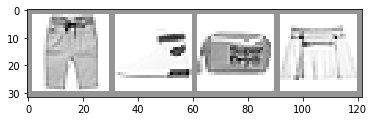

In [16]:
# Write image to out TensorBoard - specifically, a grid - using make_grid
# Get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# Create grid of images
img_grid = torchvision.utils.make_grid(images)

# Show images
matplotlib_imshow(img_grid, one_channel=True)

# Write to tensorboard
writer.add_image('four_fashion_mnist_images', img_grid)

In [14]:
%load_ext tensorboard

In [ ]:
!tensorboard --logdir=runs

26427392it [00:40, 1501651.20it/s]                              

Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.0.0 at http://localhost:6006/ (Press CTRL+C to quit)



4423680it [00:28, 445168.63it/s]                             

In [17]:
# We can visualize the lower dimensional representation of higher dimensional data via
# add_embedding method.
# Helper function
def select_n_random(data, labels, n=100):
  """Select n random datapoints and their corresponding labels from a dataset"""
  assert len(data) == len(labels)

  perm = torch.randperm(len(data))
  return data[perm][:n], labels[perm][:n]

In [18]:
trainset.data

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        ...,

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0,

In [19]:
# Select random images and their target indices
images, labels = select_n_random(trainset.data, trainset.targets)

# Get the class labels for each image
class_labels = [classes[lab] for lab in labels]

# Log embeddings
features = images.view(-1, 28 * 28)
writer.add_embedding(features,
                     metadata=class_labels,
                     label_img=images.unsqueeze(1))
writer.close()

In [21]:
!tensorboard --logdir=runs

Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.0.0 at http://localhost:6006/ (Press CTRL+C to quit)
^C


In [22]:
# Log the running loss to TensorBoard,
# along with a view into the predictions the model

def images_to_probs(net, images):
    """Generates predictions and corresponding probabilities from a trained network and a list of images"""
    output = net(images)
    # Convert output probabilities to predicted class
    _, preds_tensor = torch.max(output, 1)
    preds = np.squeeze(preds_tensor.numpy())
    return preds, [F.softmax(el, dim=0)[i].item() for i, el in zip(preds, output)]

In [32]:
def plot_classes_preds(net, images, labels):
    preds, probs = images_to_probs(net, images)
    # Plot the images in the batch, along with predicted and true labels
    fig = plt.figure(figsize=(12, 48))
    for idx in np.arange(4):
        ax = fig.add_subplot(1, 4, idx + 1, xticks=[], yticks=[])
        matplotlib_imshow(images[idx], one_channel=True)
        ax.set_title('{0}, {1:.1f}%\n(label: {2})'.format(classes[preds[idx]], probs[idx] * 100, classes[labels[idx]]),
                    color=('green' if preds[idx] == labels[idx].item() else 'red'))
    return fig

In [33]:
running_loss = 0.0
for epoch in range(1):
    for i, data in enumerate(trainloader):
        # Get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        
        # zero the parameter gradients
        optimizer.zero_grad()
        
        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        if i % 1000 == 999: # Every 1000 mini-batches
            # ...log the running loss
            writer.add_scalar('training loss',
                             running_loss / 1000,
                             epoch * len(trainloader) + i)
            
            # ...log a Matplotlib Figure showing the model's prediction on a 
            # random mini-batch
            writer.add_figure('predictions vs actual',
                             plot_classes_preds(net, inputs, labels),
                             global_step=epoch * len(trainloader) + i)
            running_loss = 0.0
print('Finished Training')

Finished Training


In [34]:
!tensorboard --logdir=runs

Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.0.0 at http://localhost:6006/ (Press CTRL+C to quit)
^C


In [35]:
# Assessing trained models with TensorBoard
# 1. Gets the probability predictions in a test_size x num_classes Tensor
# 2. Gets the preds in a test_size Tensor
class_probs = []
class_preds = []
with torch.no_grad():
    for data in testloader:
        images, labels = data
        output = net(images)
        class_probs_batch = [F.softmax(el, dim=0) for el in output]
        _, class_preds_batch = torch.max(output, 1)
        
        class_probs.append(class_probs_batch)
        class_preds.append(class_preds_batch)
test_probs = torch.cat([torch.stack(batch) for batch in class_probs])
test_preds = torch.cat(class_preds)

# Helper function
def add_pr_curve_tensorboard(class_index, test_probs, test_preds, global_step=0):
    """Takes in a 'class_index' from 0 to 9 and plots the corresponding
    precision-recall curve"""
    tensorboard_preds = test_preds == class_index
    tensorboard_probs = test_probs[:, class_index]
    
    writer.add_pr_curve(classes[class_index],
                       tensorboard_preds,
                       tensorboard_probs,
                       global_step=global_step)
    writer.close()

In [36]:
# plot all the pr curves
for i in range(len(classes)):
    add_pr_curve_tensorboard(i, test_probs, test_preds)

In [ ]:
!tensorboard --logdir=runs

Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.0.0 at http://localhost:6006/ (Press CTRL+C to quit)
